In [15]:
import numpy as np 
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten

In [16]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [17]:
x_train = x_train/ 255
x_test = x_test/ 255

In [18]:
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

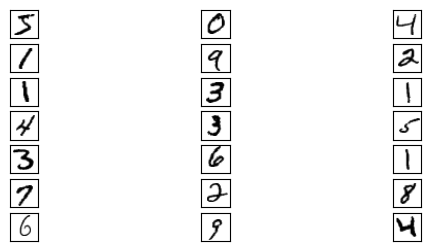

In [19]:
plt.figure(figsize=(7,3))
for i in range(21):
    plt.subplot (7,3, i+1) 
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)

plt.show()


########################################################################################

In [22]:
########################################Сама Нейронка############################################


model = keras.Sequential([
    Flatten(input_shape= (28,28,1)), 
    Dense(128, activation='relu'), 
    Dense(10, activation = 'softmax')
])
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

None


In [24]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])


In [25]:
model.fit(x_train, y_train_cat, batch_size=32, epochs=5, validation_split=0.2)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 558us/step - accuracy: 0.8747 - loss: 0.4491 - val_accuracy: 0.9543 - val_loss: 0.1634
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 530us/step - accuracy: 0.9610 - loss: 0.1335 - val_accuracy: 0.9634 - val_loss: 0.1288
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 525us/step - accuracy: 0.9722 - loss: 0.0928 - val_accuracy: 0.9678 - val_loss: 0.1092
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 526us/step - accuracy: 0.9814 - loss: 0.0626 - val_accuracy: 0.9731 - val_loss: 0.0938
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 525us/step - accuracy: 0.9844 - loss: 0.0500 - val_accuracy: 0.9729 - val_loss: 0.0904


In [26]:
model.evaluate(x_test, y_test_cat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 259us/step - accuracy: 0.9706 - loss: 0.0912


[0.07733632624149323, 0.9750999808311462]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
[[3.6944737e-08 9.9625838e-01 2.4364874e-06 6.2090030e-06 7.8328385e-06
  4.2515889e-09 5.0745992e-08 3.7093423e-03 1.5536465e-05 3.0908205e-07]]
Распознанная цифра: 1


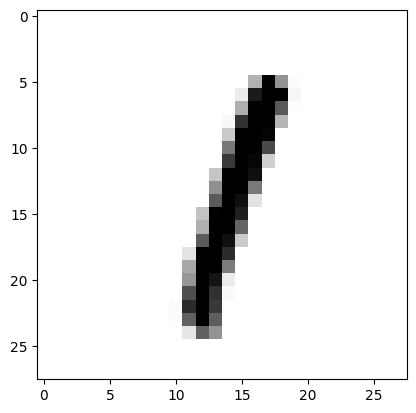

In [33]:
n = 5

x = np.expand_dims(x_test[n], axis=0)
res = model.predict(x)
print(res)
print(f"Распознанная цифра: {np. argmax(res)}")
plt.imshow(x_test[n], cmap=plt.cm.binary)
plt.show()

In [34]:
pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)
print(pred.shape)
print(pred[:20])

print(y_test[:20])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 261us/step
(10000,)
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [35]:
mask = pred == y_test
print(mask[:10])

x_false = x_test[~mask]
p_false = pred[~mask]
print(x_false.shape)

[ True  True  True  True  True  True  True  True  True  True]
(249, 28, 28)


Значение сети: 8


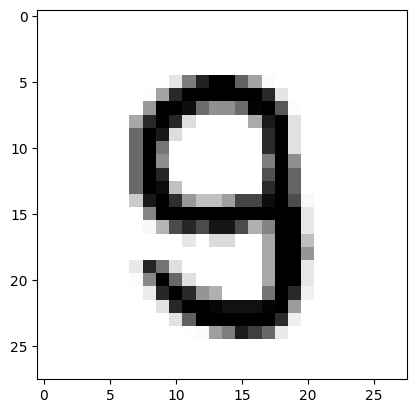

Значение сети: 2


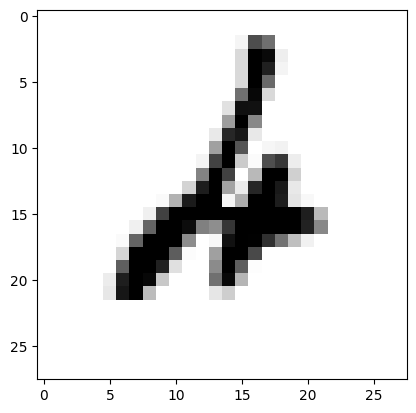

Значение сети: 7


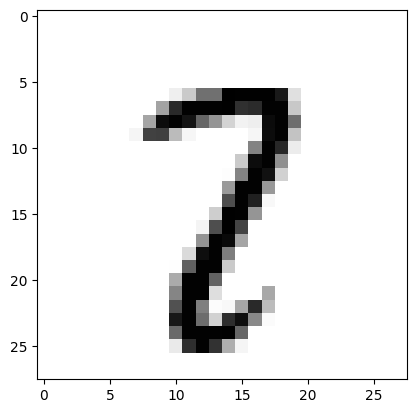

Значение сети: 3


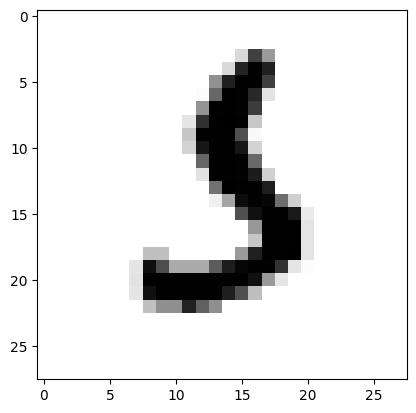

Значение сети: 4


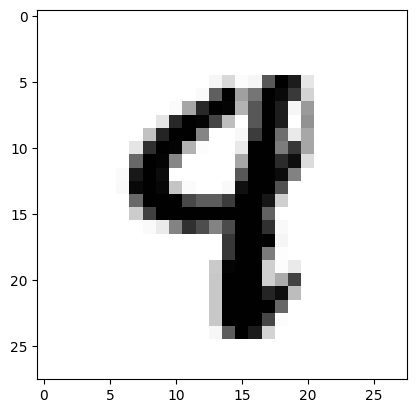

In [37]:
for i in range(5):
    print("Значение сети: "+str(p_false[i]))
    plt.imshow(x_false[i], cmap=plt.cm.binary)
    plt.show()